<a href="https://colab.research.google.com/github/Leonard9868/Leonard9868.github.io/blob/master/Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 将谷歌云盘挂载到远程主机
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 更改运行目录
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/')

In [0]:
# 查看目录结构
os.listdir('./第八届中国软件杯/BankCardImages/')

['test_images_2', 'train_images', 'test_images_1']

In [0]:
# 设置根数据目录并查看数据集情况
base_dir = './第八届中国软件杯/BankCardImages/train_images'
base_data_fnames = os.listdir(base_dir)
print(base_data_fnames[:10])
print('total base images:', len(base_data_fnames))

['0500x_0.png', '2260x_0.png', '2179k_0.png', '0362b_0.png', '0080x_0.png', '260_c_0.png', '1799u_0.png', '1668c_0.png', '0374r_0.png', '1597e_0.png']
total base images: 1084


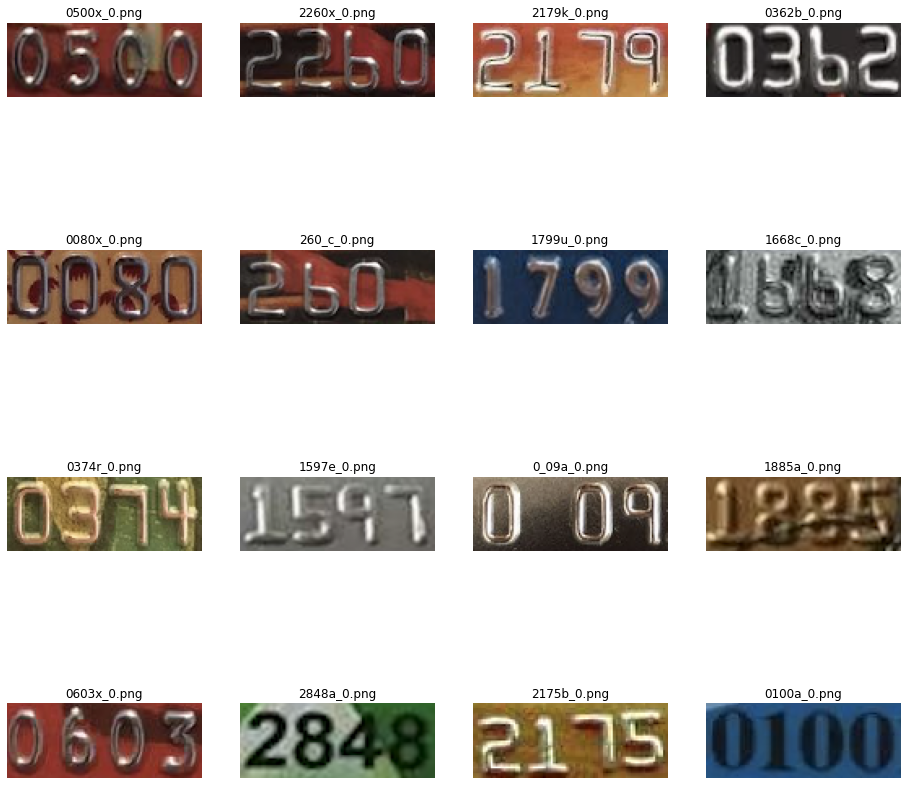

In [0]:
# 查看数据集样本及其对应标签情况
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)

for i,imgpath in enumerate(
    [os.path.join(base_dir, fname)
               for fname in base_data_fnames[:16]]
):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    img = mpimg.imread(imgpath)
    plt.title(base_data_fnames[i])
    plt.imshow(img)

In [0]:
# 创建分割后的训练样本的存放目录
os.mkdir('./第八届中国软件杯/IdentificationImages')

In [0]:
# 分割原始数据样本为单数字图片并存放到相应目录
from PIL import Image
IdentificationImages_dir = './第八届中国软件杯/IdentificationImages'
for j in range(len(base_data_fnames)):
    img = Image.open(os.path.join(base_dir, base_data_fnames[j]))
    img_size = img.size
    x = 0
    y = 0
    w = 30
    h = 46
    region1 = img.crop((x, y, w, h))
    crop1 = str(base_data_fnames[j][0]+base_data_fnames[j][4]+base_data_fnames[j][5]+base_data_fnames[j][6]+'0'+'_'+('%04d'% j)+base_data_fnames[j][7]+base_data_fnames[j][8]
         +base_data_fnames[j][9]+base_data_fnames[j][10])
    region1.save(os.path.join(IdentificationImages_dir,crop1))
    region2 = img.crop((x+w, y, x+2*w, h))
    crop2 = str(base_data_fnames[j][1]+base_data_fnames[j][4]+base_data_fnames[j][5]+base_data_fnames[j][6]+'1'+'_'+('%04d'% j)+base_data_fnames[j][7]+base_data_fnames[j][8]
         +base_data_fnames[j][9]+base_data_fnames[j][10])
    region2.save(os.path.join(IdentificationImages_dir,crop2))
    region3 = img.crop((x+2*w, y, x+3*w, h))
    crop3 = str(base_data_fnames[j][2]+base_data_fnames[j][4]+base_data_fnames[j][5]+base_data_fnames[j][6]+'2'+'_'+('%04d'% j)+base_data_fnames[j][7]+base_data_fnames[j][8]
         +base_data_fnames[j][9]+base_data_fnames[j][10])
    region3.save(os.path.join(IdentificationImages_dir,crop3))
    region4 = img.crop((x+3*w, y, x+4*w, h))
    crop4 = str(base_data_fnames[j][3]+base_data_fnames[j][4]+base_data_fnames[j][5]+base_data_fnames[j][6]+'3'+'_'+('%04d'% j)+base_data_fnames[j][7]+base_data_fnames[j][8]
         +base_data_fnames[j][9]+base_data_fnames[j][10])
    region4.save(os.path.join(IdentificationImages_dir,crop4))

In [0]:
# 检查单数字图片数目
print(len(os.listdir(IdentificationImages_dir)))

4336


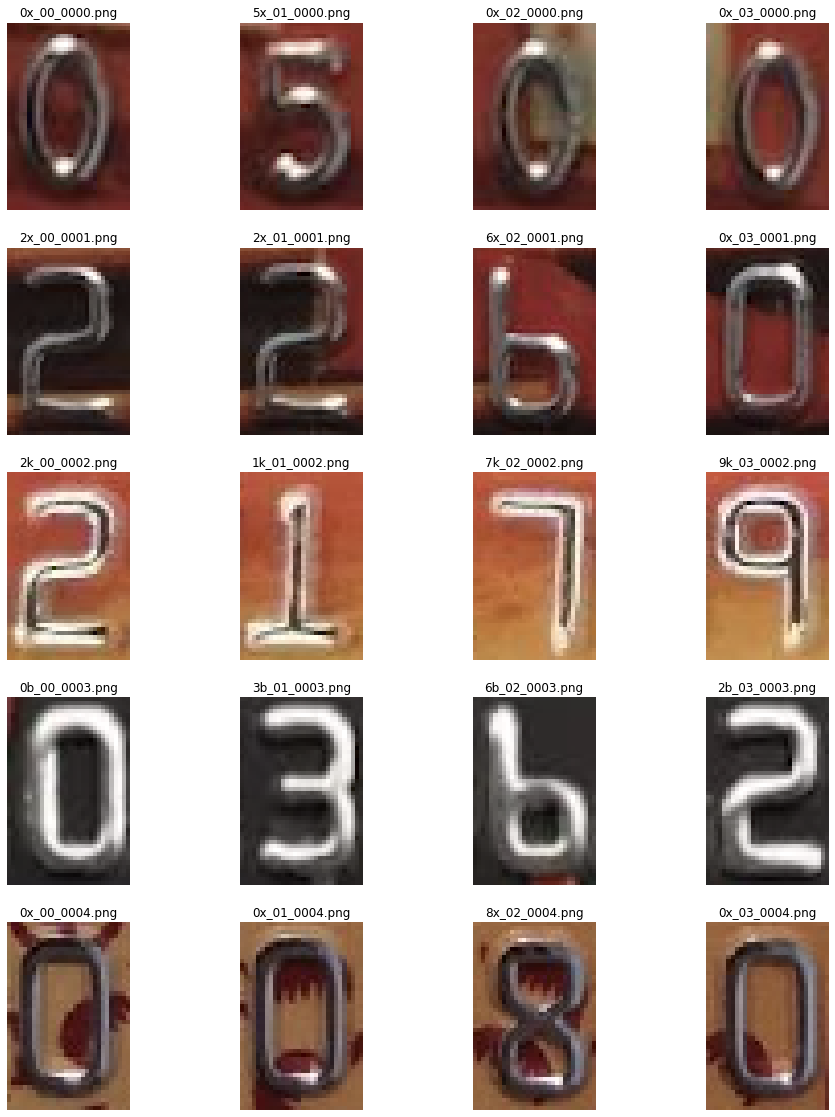

In [0]:
# 查看单数字图片样本及其标签
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 5)

IdentificationImages_fnames = os.listdir(IdentificationImages_dir)
for i,imgpath in enumerate(
    [os.path.join(IdentificationImages_dir,fname)
    for fname in IdentificationImages_fnames[:20]]
):
    sp = plt.subplot(5, 4, i+1)
    sp.axis('Off')
    img = mpimg.imread(imgpath)
    plt.title(IdentificationImages_fnames[i])
    plt.imshow(img)

In [0]:
# 创建训练、验证和测试数据目录
os.mkdir('./第八届中国软件杯/training_images')
os.mkdir('./第八届中国软件杯/validation_images')
os.mkdir('./第八届中国软件杯/testing_images')
training_images_dir = './第八届中国软件杯/training_images'
validation_images_dir = './第八届中国软件杯/validation_images'
testing_images_dir = './第八届中国软件杯/testing_images'

In [0]:
# 将单数字图片按一定比例分别存放在训练、验证和测试数据目录下
import shutil
i = 0
for file in os.listdir(IdentificationImages_dir):
    if i < 4000:
        srcFile = os.path.join(IdentificationImages_dir,file)
        shutil.move(srcFile,training_images_dir)
    elif i < 4300:
        srcFile = os.path.join(IdentificationImages_dir,file)
        shutil.move(srcFile,validation_images_dir)
    else:
        srcFile = os.path.join(IdentificationImages_dir,file)
        shutil.move(srcFile,testing_images_dir)
    i += 1

In [0]:
# 检查单数字图片的训练、验证和测试图片数目
print('训练图片个数：', len(os.listdir(training_images_dir)))
print('验证图片个数：', len(os.listdir(validation_images_dir)))
print('测试图片个数：', len(os.listdir(testing_images_dir)))

训练图片个数： 4000
验证图片个数： 300
测试图片个数： 36


In [0]:
os.makedirs('./第八届中国软件杯/train_dir/0')
os.makedirs('./第八届中国软件杯/train_dir/1')
os.makedirs('./第八届中国软件杯/train_dir/2')
os.makedirs('./第八届中国软件杯/train_dir/3')
os.makedirs('./第八届中国软件杯/train_dir/4')
os.makedirs('./第八届中国软件杯/train_dir/5')
os.makedirs('./第八届中国软件杯/train_dir/6')
os.makedirs('./第八届中国软件杯/train_dir/7')
os.makedirs('./第八届中国软件杯/train_dir/8')
os.makedirs('./第八届中国软件杯/train_dir/9')
os.makedirs('./第八届中国软件杯/train_dir/_')

os.makedirs('./第八届中国软件杯/validation_dir/0')
os.makedirs('./第八届中国软件杯/validation_dir/1')
os.makedirs('./第八届中国软件杯/validation_dir/2')
os.makedirs('./第八届中国软件杯/validation_dir/3')
os.makedirs('./第八届中国软件杯/validation_dir/4')
os.makedirs('./第八届中国软件杯/validation_dir/5')
os.makedirs('./第八届中国软件杯/validation_dir/6')
os.makedirs('./第八届中国软件杯/validation_dir/7')
os.makedirs('./第八届中国软件杯/validation_dir/8')
os.makedirs('./第八届中国软件杯/validation_dir/9')
os.makedirs('./第八届中国软件杯/validation_dir/_')

os.makedirs('./第八届中国软件杯/test_dir/0')
os.makedirs('./第八届中国软件杯/test_dir/1')
os.makedirs('./第八届中国软件杯/test_dir/2')
os.makedirs('./第八届中国软件杯/test_dir/3')
os.makedirs('./第八届中国软件杯/test_dir/4')
os.makedirs('./第八届中国软件杯/test_dir/5')
os.makedirs('./第八届中国软件杯/test_dir/6')
os.makedirs('./第八届中国软件杯/test_dir/7')
os.makedirs('./第八届中国软件杯/test_dir/8')
os.makedirs('./第八届中国软件杯/test_dir/9')
os.makedirs('./第八届中国软件杯/test_dir/_')

In [0]:
os.listdir('./第八届中国软件杯/train_dir')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_']

In [0]:
os.listdir('./第八届中国软件杯/validation_dir')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_']

In [0]:
os.listdir('./第八届中国软件杯/test_dir')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_']

In [0]:
for file in os.listdir(training_images_dir):
    if file[0] == '0':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/0')
    elif file[0] == '1':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/1')
    elif file[0] == '2':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/2')
    elif file[0] == '3':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/3')
    elif file[0] == '4':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/4')
    elif file[0] == '5':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/5')
    elif file[0] == '6':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/6')
    elif file[0] == '7':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/7')
    elif file[0] == '8':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/8')
    elif file[0] == '9':
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/9')
    else:
        srcFile = os.path.join(training_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/train_dir/_')

for file in os.listdir(validation_images_dir):
    if file[0] == '0':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/0')
    elif file[0] == '1':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/1')
    elif file[0] == '2':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/2')
    elif file[0] == '3':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/3')
    elif file[0] == '4':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/4')
    elif file[0] == '5':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/5')
    elif file[0] == '6':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/6')
    elif file[0] == '7':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/7')
    elif file[0] == '8':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/8')
    elif file[0] == '9':
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/9')
    else:
        srcFile = os.path.join(validation_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/validation_dir/_')

for file in os.listdir(testing_images_dir):
    if file[0] == '0':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/0')
    elif file[0] == '1':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/1')
    elif file[0] == '2':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/2')
    elif file[0] == '3':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/3')
    elif file[0] == '4':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/4')
    elif file[0] == '5':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/5')
    elif file[0] == '6':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/6')
    elif file[0] == '7':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/7')
    elif file[0] == '8':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/8')
    elif file[0] == '9':
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/9')
    else:
        srcFile = os.path.join(testing_images_dir,file)
        shutil.move(srcFile,'./第八届中国软件杯/test_dir/_')

In [0]:
os.listdir('./第八届中国软件杯/test_dir/9')

['9b_03_1081.png']

In [0]:
train_dir = './第八届中国软件杯/train_dir'
validation_dir = './第八届中国软件杯/validation_dir'
test_dir = './第八届中国软件杯/test_dir'

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(30, 46),  
        batch_size=1,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(30, 46),
        batch_size=1,
        class_mode='categorical')

Found 4000 images belonging to 11 classes.
Found 300 images belonging to 11 classes.


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(30, 46, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(11, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 46, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 44, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 22, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 10, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 4, 64)          0     

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=4000,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=300,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
4000/4000 - 16s - loss: 1.5931 - accuracy: 0.4658 - val_loss: 0.6631 - val_accuracy: 0.8433
Epoch 2/15
4000/4000 - 15s - loss: 0.6482 - accuracy: 0.8095 - val_loss: 0.4110 - val_accuracy: 0.9100
Epoch 3/15
4000/4000 - 15s - loss: 0.3975 - accuracy: 0.8888 - val_loss: 0.2580 - val_accuracy: 0.9333
Epoch 4/15
4000/4000 - 15s - loss: 0.2688 - accuracy: 0.9275 - val_loss: 0.2677 - val_accuracy: 0.9233
Epoch 5/15
4000/4000 - 15s - loss: 0.2075 - accuracy: 0.9425 - val_loss: 0.1202 - val_accuracy: 0.9533
Epoch 6/15
4000/4000 - 15s - loss: 0.1589 - accuracy: 0.9580 - val_loss: 0.1641 - val_accuracy: 0.9500
Epoch 7/15
4000/4000 - 15s - loss: 0.1260 - accuracy: 0.9638 - val_loss: 0.0930 - val_accuracy: 0.9700
Epoch 8/15
4000/4000 - 15s - loss: 0.0984 - accuracy: 0.9712 - val_loss: 0.0928 - val_accuracy: 0.9700
Epoch 9/15
4000/4000 - 15s - loss: 0.0813 - accuracy: 0.9772 - val_loss: 0.1365 - val_accuracy: 0.95

Text(0.5, 1.0, 'Training and validation loss')

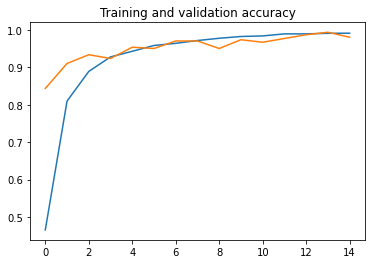

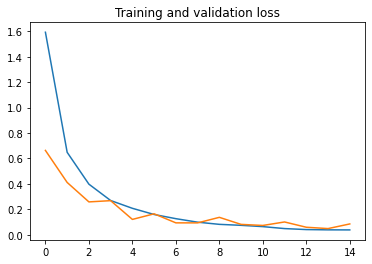

In [0]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
testImage = Image.open('./第八届中国软件杯/test_dir/2/2b_02_1077.png').resize((46,30))
testImage

In [0]:
import numpy as np
testImage = np.array(testImage)/255.0
testImage.shape

(30, 46, 3)

In [0]:
testResult = model.predict(testImage[np.newaxis, ...])
testResult

array([[9.7567652e-05, 6.5568988e-11, 9.9989676e-01, 4.7228282e-06,
        3.3076559e-14, 3.8393513e-13, 4.5387461e-12, 4.4390114e-09,
        7.7861102e-07, 7.5187842e-11, 1.4213053e-11]], dtype=float32)

In [0]:
predicted_class = np.argmax(testResult[0], axis=-1)
predicted_class

2